<a href="https://colab.research.google.com/github/khadija199904/Classification_Images_avec_R-seau_Neuronal/blob/main/Classification_fashon_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt


# Load Dataset


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [ ]:
print ("Dimensions de X_train: ",X_train.shape)
print ("Dimensions de y_train: " ,y_train.shape)
print ("Dimensions de X_test: " ,X_test.shape)
print ("Dimensions de y_test: " ,y_test.shape)

Dimensions de X_train:  (60000, 28, 28)
Dimensions de y_train:  (60000,)
Dimensions de X_test:  (10000, 28, 28)
Dimensions de y_test:  (10000,)


In [ ]:
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [ ]:
# Afficher les valeurs des labels
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]



Visualizations

Text(0.5, 1.0, 'Label :9')

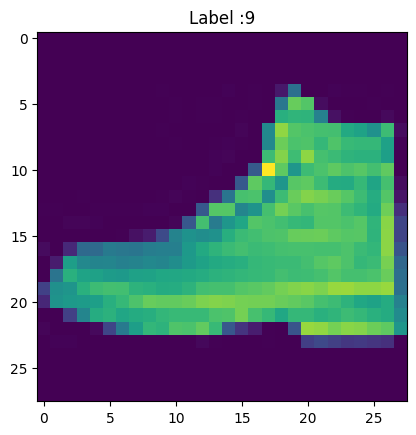

In [ ]:
i = 50000
plt.imshow(X_train[i])
plt.title (f"Label :{y_train[i]}")

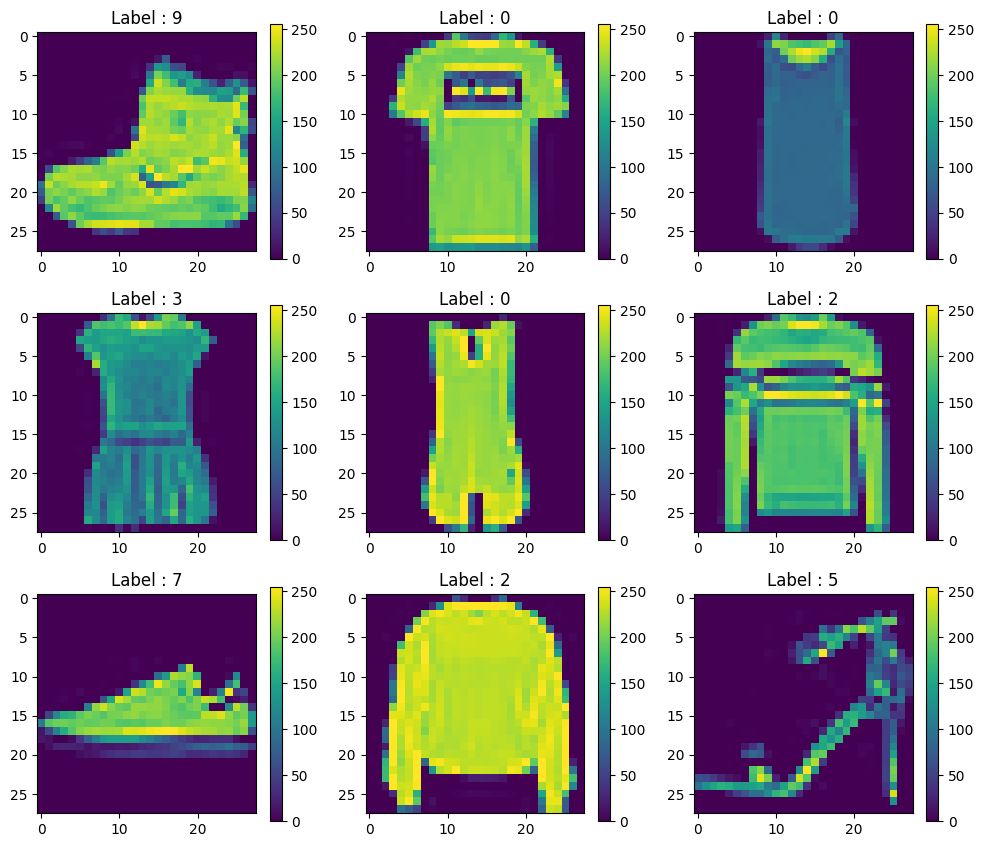

In [ ]:
plt.figure(figsize=(12,14))
for i in range (9) :
  plt.subplot(4,3,i+1)
  plt.imshow(X_train[i])
  plt.title (f"Label : {y_train[i]}")
  plt.colorbar()
plt.show()


## Normalisation (division par 255)

In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0


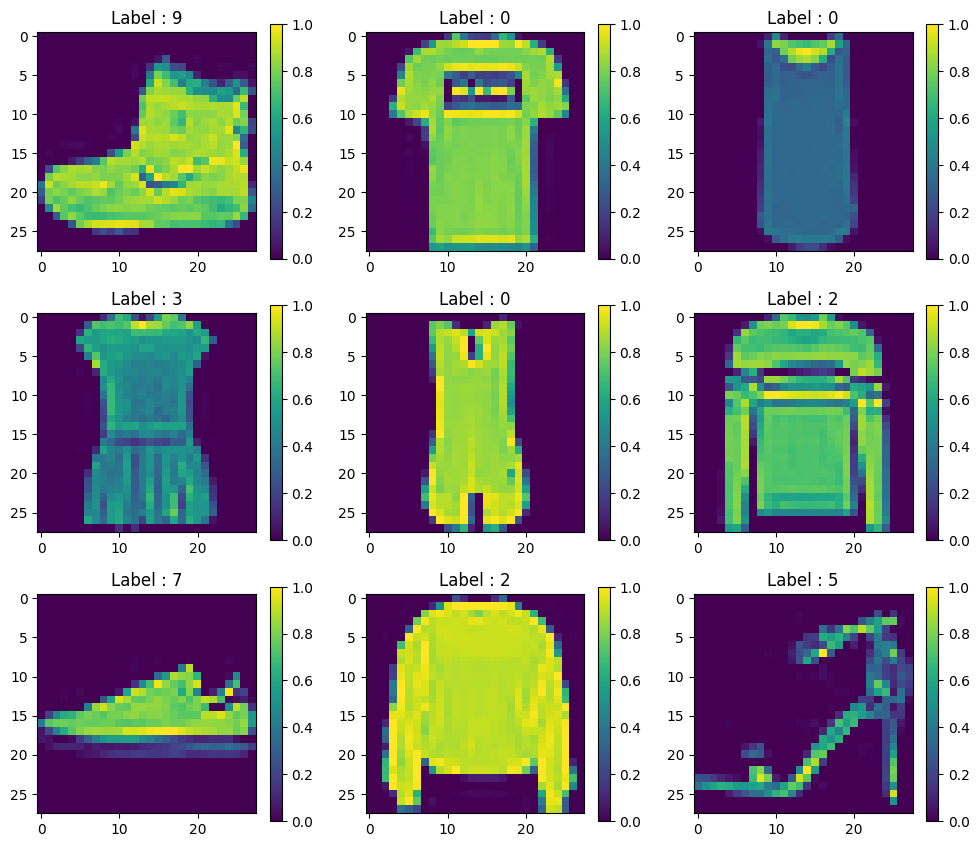

In [ ]:
plt.figure(figsize=(12,14))
for i in range (9) :
  plt.subplot(4,3,i+1)
  plt.imshow(X_train[i])
  plt.title (f"Label : {y_train[i]}")
  plt.colorbar()
plt.show()



## creation une liste des noms de classes de Fashion-MNIST


In [ ]:
Class_names = ["T-shirt","Sirwal","Pull","Ksiwa","Manteau","Sandala","Chemise","Basket","Sac","Bott"]

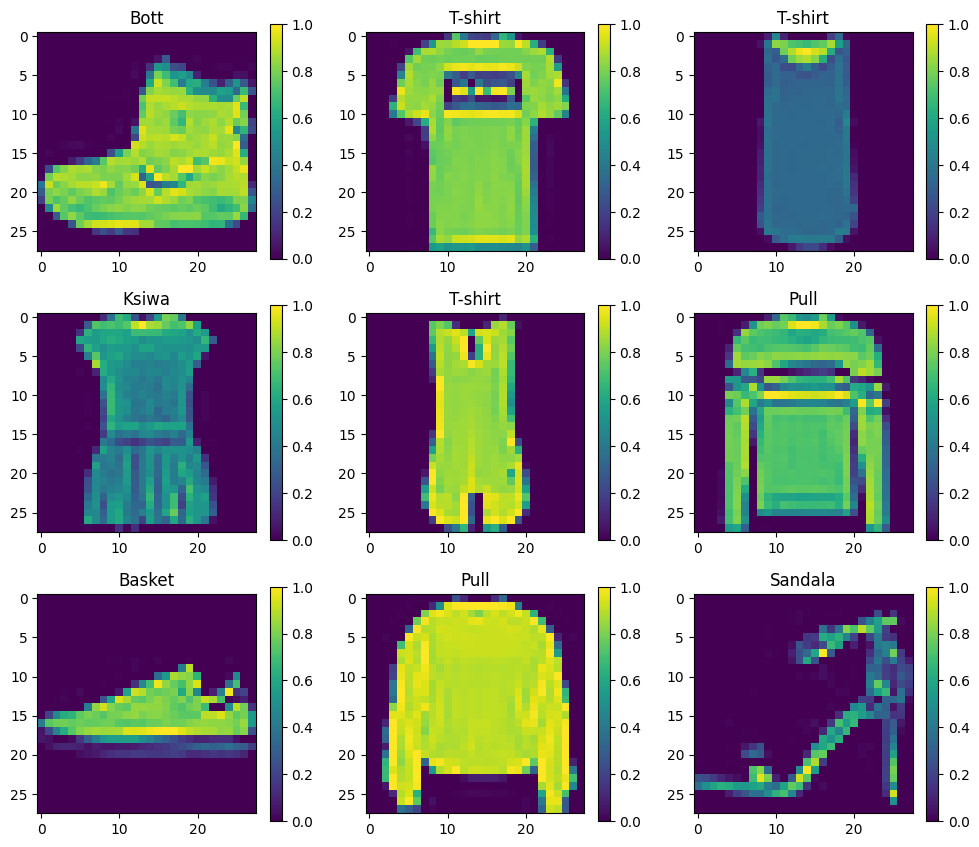

In [ ]:
plt.figure(figsize=(12,14))
for i in range (9) :
  plt.subplot(4,3,i+1)
  plt.imshow(X_train[i])
  label_name = Class_names[y_train[i]]
  plt.title (label_name)
  plt.colorbar()
plt.show()

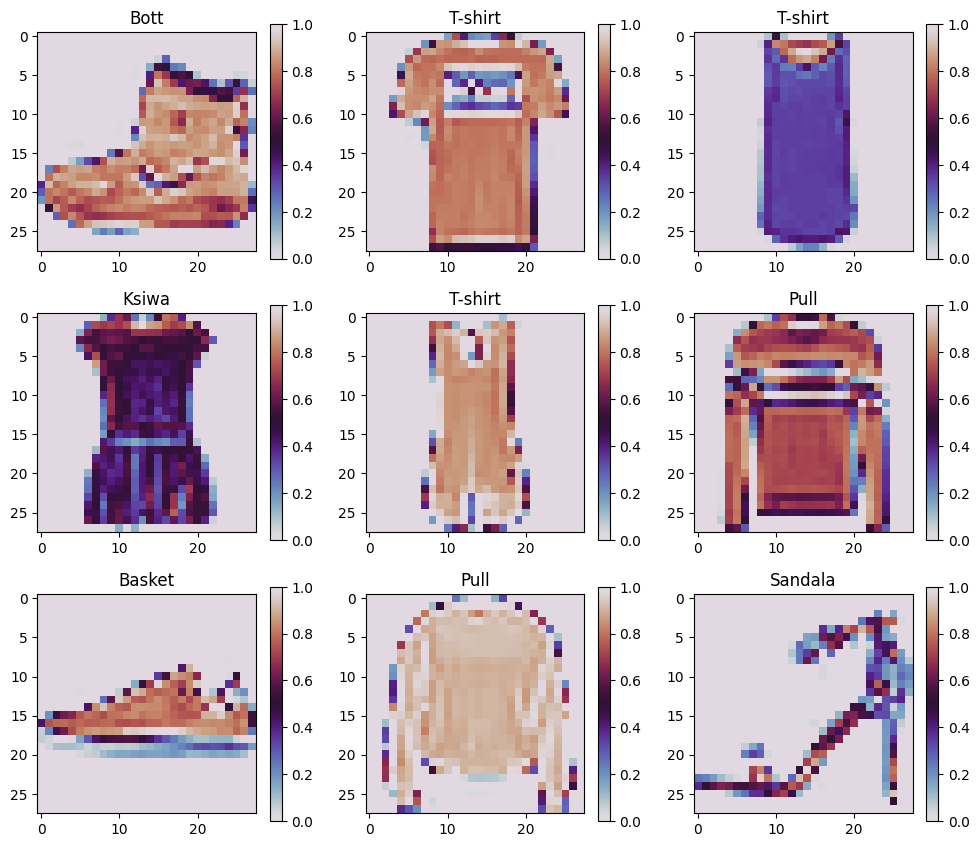

In [ ]:
plt.figure(figsize=(12,14))
for i in range (9) :
  plt.subplot(4,3,i+1)
  plt.imshow(X_train[i],cmap='twilight')
  label_name = Class_names[y_train[i]]
  plt.title (label_name)
  plt.colorbar()
plt.show()

## Building model


In [ ]:
!pip install tensorflow.keras

In [ ]:
from tensorflow import keras
from tensorflow.keras import Sequential,layers, models
from tensorflow.keras.layers import Flatten, Dense

In [ ]:
model = tf.keras.Sequential([Flatten(input_shape=(28,28)),
                   Dense(128, activation='relu',name='layer1'),
                   Dense(10, activation='softmax',name="Output")],
                             name="first_model"

                   )

In [ ]:
model.summary()

Model: "first_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile ( optimizer = 'adam',
               loss="sparse_categorical_crossentropy",
                metrics = ['accuracy'])

## Entrainnement du model pour epochs 5

In [ ]:
model.fit(X_train,y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7820 - loss: 0.6238
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8638 - loss: 0.3758
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8788 - loss: 0.3332
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8864 - loss: 0.3095
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8889 - loss: 0.2940


In [ ]:
# Evaluation
test_loss, test_acc  = model.evaluate(X_test,y_test,batch_size=128)
print('\nTest accuracy:', test_acc,'\nTest loss:',test_loss)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8834 - loss: 0.4041

Test accuracy: 0.8828999996185303 
Test loss: 0.4047439694404602


In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test)
print(predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[[0.08598098 0.08598091 0.08598144 ... 0.09037203 0.08604082 0.22141168]
 [0.08583117 0.08581418 0.22425292 ... 0.08581418 0.08581419 0.08581418]
 [0.08533686 0.23196898 0.08533674 ... 0.08533674 0.08533674 0.08533674]
 ...
 [0.08563808 0.08547625 0.08568254 ... 0.08547708 0.22975095 0.08547625]
 [0.08533856 0.23194161 0.08533853 ... 0.08533849 0.08533849 0.08533849]
 [0.08565269 0.08564412 0.08565637 ... 0.08669543 0.08668566 0.08565807]]


In [ ]:
predictions[0]

array([0.08598098, 0.08598091, 0.08598144, 0.08598089, 0.08598142,
       0.08628628, 0.08598364, 0.09037203, 0.08604082, 0.22141168],
      dtype=float32)

In [ ]:
a = np.argmax(predictions[0])
print(a)

9


Text(0.5, 1.0, 'Label : 9')

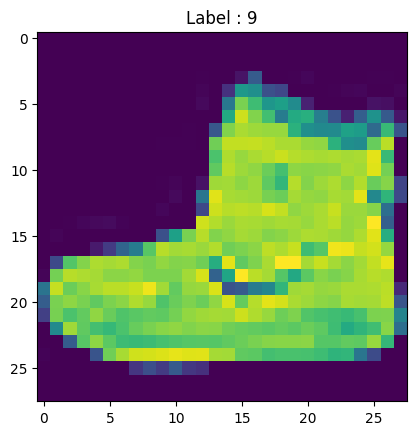

In [ ]:
plt.imshow(X_train[0])
plt.title (f"Label : {y_train[0]}")

Text(0.5, 1.0, 'Label : 9')

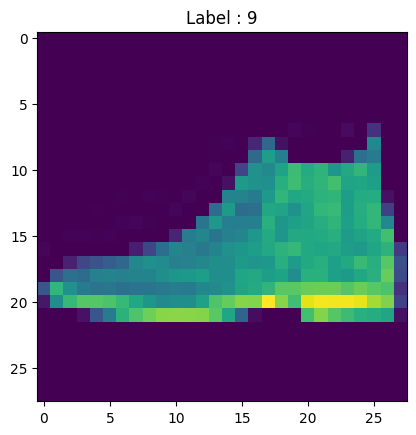

In [ ]:
plt.imshow(X_test[0])
plt.title (f"Label : {y_test[0]}")

## Entrainnement du model pour epoch 8


In [ ]:
model.fit(X_train,y_train, epochs=8)
# Evaluation
resultats = model.evaluate(X_test,y_test,batch_size=128)


Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9343 - loss: 0.1704
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9397 - loss: 0.1644
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9397 - loss: 0.1581
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9408 - loss: 0.1560
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9395 - loss: 0.1603
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9408 - loss: 0.1506
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9458 - loss: 0.1449
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9474 - loss: 0.1396
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8834 - loss: 0.4041


In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


*CNN*


In [ ]:
CNN_model = Sequential([ layers.Conv2D(28, (3, 3), padding="same", activation="relu", input_shape=(28, 28, 3)),
                        layers.MaxPooling2D(pool_size=(2, 2)),
                         layers.MaxPooling2D((2, 2)),
                         layers.Conv2D(64, (3, 3), activation='relu'),
                         layers.MaxPooling2D((2, 2)),



                        ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
CNN_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 28)     │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 7, 7, 28)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 5, 5, 64)       │        16,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,976 (66.31 KB)

 Trainable params: 16,976 (66.31 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
CNN_model2 = Sequential([ layers.Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)),
                        layers.MaxPooling2D(pool_size=(2, 2)),
                         layers.MaxPooling2D((2, 2)),
                         layers.Conv2D(64, (3, 3), activation='relu'),
                         layers.MaxPooling2D((2, 2)),
                          layers.Flatten(),
                          layers.Dense(64, activation='relu'),
                          layers.Dense(10, activation='softmax',name="Output")],
                             name="first_model")



In [ ]:
CNN_model2.summary()

Model: "first_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 6, 6, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,970 (222.54 KB)

 Trainable params: 56,970 (222.54 KB)

 Non-trainable params: 0 (0.00 B)